<a href="http://laf-fabric.readthedocs.org/en/latest/" target="_blank"><img align="left" src="images/laf-fabric-xsmall.png"/></a>
<a href="http://www.persistent-identifier.nl/?identifier=urn%3Anbn%3Anl%3Aui%3A13-048i-71" target="_blank"><img align="left"src="images/etcbc4easy-small.png"/></a>
<a href="http://www.godgeleerdheid.vu.nl/etcbc" target="_blank"><img align="right" src="images/VU-ETCBC-xsmall.png"/></a>
<a href="https://www.academic-bible.com/en/online-bibles/biblia-hebraica-stuttgartensia-bhs/read-the-bible-text/" target="_blank"><img align="right" src="files/images/DBG-xsmall.png"/></a>

# Parallel Passages in the MT

We want to make a list of **all** parallel passages in the Masoretic text.
More precisely, we want to produce a set of *cliques*, a clique being a set of passages that are *quite* similar.

This quote triggered Dirk to write this notebook:

> Finally, the Old Testament Parallels module in Accordance is a helpful resource that enables the researcher to examine 435 sets of parallel texts, or in some cases very similar wording in different texts, in both the MT and translation, but the large number of sets of texts in this database should not fool one to think it is complete or even nearly complete for all parallel writings in the Hebrew Bible.

(Rezetko and Young 2014, 5.2.2, p 148) (see References below)


# Authors

This notebook is being written by [Dirk Roorda](dirk.roorda@dans.knaw.nl) while discussing ideas with 
[Martijn Naaijer](m.naaijer@vu.nl). 

# About

This is an IPython notebook. It contains a working program to carry out the computations that we need for
finding parallel passages.
You can download this notebook and run it on your computer, provided you have
[LAF-Fabric](http://laf-fabric.readthedocs.org/en/latest/texts/welcome.html) installed.
An easy way to do that is describe [here](https://github.com/ETCBC/llshebanq).

There is not only program code in this notebook, but also an account of the method and the decisions we
have made in the process.

Moreover, the notebook presents you the *results*.


# Status

**Last modified: 2015-07-16**


# References

* (Rezetko and Young, 2014) Robert Rezetko and Ian Young.
  Historical linguistics & BiBlical HeBrew. Steps Toward an Integrated Approach.
  *Ancient Near East Monographs, Number9*. SBL Press Atlanta. 2014. 
  [PDF Open access available](https://www.google.nl/url?sa=t&rct=j&q=&esrc=s&source=web&cd=2&ved=0CCgQFjAB&url=http%3A%2F%2Fwww.sbl-site.org%2Fassets%2Fpdfs%2Fpubs%2F9781628370461_OA.pdf&ei=2QSdVf-vAYSGzAPArJeYCg&usg=AFQjCNFA3TymYlsebQ0MwXq2FmJCSHNUtg&sig2=LaXuAC5k3V7fSXC6ZVx05w&bvm=bv.96952980,d.bGQ)

# Results

The results are organized by means of index files.

1. A link to a file with all *cliques* (which are the sets of similar passages)
1. A list of links to chapter-by-chapter diff files (for cliques with just two members)
1. A list of all cliques not covered by the chapter-by-chapter diffs

To get into the variants quickly, inspect the list (2.) and click through to see the actual variant material in chapter context.

Not all variants occur here, so continue with (3.) to see the remaining cliques.

Sometimes in (2.) a chapter diff file does not indicate clearly the relevant common part of both chapters.
In that case you have to consult the big list (1.)

# Results per experiment
The results presented here are dependent on particular parameter choices, which are explained in the method discussion below. Here you can view the results of all experiments done so far.

All these results can be downloaded from my
[SURFdrive](https://surfdrive.surf.nl/files/public.php?service=files&t=8b8da8a9cdaca96f9b7bb63205bbcc2f).
as well.

**Legend**

``00index_`` **O**bject/**F**ixed ``_`` **sentence**/**(half_)verse**/*chunk size* ``_`` *similarity method* ``_`` *similarity threshold* ``_`` *cohesion*

In [ ]:
# run this cell after all other cells
HTML(other_exps)

# Method description

Here we discuss the method we used to arrive at a list of parallel passages in the Masoretic Text of the Hebrew Bible.

## Similarity

We have to find passages in the MT that are *similar*.
Therefore we have to *chunk* the text in some way, and then compute the similarities between pairs of chunks.

There are many ways to define and compute similarity between texts.
Here, we have tried two methods ``SET`` and ``LCS``.
Both methods define similarity as a ratio between what is common and what is distinct in a pair of chunks.

### SET
In this method, chunks are transformed to sets of lexemes, and we use as measure for their similarity:

$$ s(C_1, C_2) = {\vert C_1 \cap C_2\vert \over \vert C_1 \cup C_2 \vert} $$

### LCS
In this method, chunks are strings of lexemes and we take the ratio between the length of the common parts
and the length of the total material.

For this we need an extra module:

``pip install python-Levenshtein``

whose documentation is
[here](http://www.coli.uni-saarland.de/courses/LT1/2011/slides/Python-Levenshtein.html).

## Performance

Similarity computation is the part where the heavy lifting occurs.
It is basically quadratic in the number of chunks, so if you have verses as chunks (~ 21,000),
you need to do ~ 250,000,000 similarity computations, and if you use sentences (~ 65,000), 
you need to do ~ 2,000,000,000 ones!
The computation of a single similarity should be *really* fast.

Besides that, we use two ways to economize:

* after having computed a matrix for a specific set of parameter values, we save the matrix to disk;
  new runs can load the matrix from disk in a matter of seconds;
* we do not store low similarity values in the matrix, low being < ``MATRIX_THRESHOLD``.

The ``LCS`` method is more complicated.
We have tried the ``ratio`` method from the ``difflib`` package that is present in the standard python distribution.
This is unbearably slow for our purposes.
The ``ratio`` method in the ``Levenshtein`` package is much quicker.

See the table under **Chunking** for a performance indication per similarity method and chunking method.

Here is a list of the sizes of the stored similarity matrices:

|parameters                     |size of matrix |
|:------------------------------|--------------:|
|matrix_F_1000_SET_50           |          223B |
|matrix_F_100_SET_50            |          6.6K |
|matrix_F_10_SET_50             |          1.8M |
|matrix_F_200_SET_50            |          2.1K |
|matrix_F_20_SET_50             |          113K |
|matrix_F_50_SET_50             |          18K  |
|matrix_O_half_verse_LCS_60     |          40M  |
|matrix_O_half_verse_SET_50     |          3.6M |
|matrix_O_sentence_LCS_60       |          212M |
|matrix_O_sentence_SET_50       |          82M  |
|matrix_O_verse_LCS_60          |          2.3M |
|matrix_O_verse_SET_50          |          509K |

### Decision
We consider the fact that two chunks have largely overlapping lexical material sufficient reason to put them
in the parallel passages list.

It remains to be seen whether we need the extra sophistication of ``LCS``.
The results should have the last word. 
The risk is that ``LCS`` could fail to spot related passages when there is a large amount of transposition going on.


## Chunking

There are several ways to chunk the text

* fixed chunks of approximately ``CHUNK_SIZE`` words
* by object, such as verse, sentence

After chunking, we prepare the chunks for similarity measuring.

### Observations

#### Fixed chunking
A fixed chunking is unnatural, but if the chunk size is small, it yields good results.
The results are somewhat difficult to inspect, because they generally do not respect constituent boundaries.
It is to be expected that fixed chunks will be *out of phase*, meaning that if we have similar passages, the fixed
chunking works in such a way that the chunks involved in these passages are not aligned with each other.
So they will have a lower similarity than they could have, if they were aligned.
This is a source of artificial noise in the outcome and/or missed cases.

#### Object chunking
We can also chunk by object, such as verse, half_verse or sentence.
Chunking by verse is very much like chunking in fixed chunks of size 20, performance-wise.
Chunking by *half_verse* is comparable to fixed chunks -f size 10.

| object type | # chunks   | # comparisons | time with ``SET`` | time with ``LCS`` |
|:------------|-----------:|--------------:|------------------:|------------------:|
| sentence    | 64,125     | 2056 M        | 63 min            | 68 min            |
| half_verse  | 45,087     | 1016 M        | 41 min            | 50 min            |
| verse       | 23,213     |  270 M        | 14 min            | 31 min            |

Chunking by sentence yields ~ 65,000 chunks, leading to ~ 2,000,000,000 comparisons.
Besides causing a huge performance burden, sentence-sized chunks generate an enormous amount of
false positives, because there very many very short sentences in the text.

A quick glance over the results obtained with sentence chunks suffices to draw conclusions.
You can find these in the Result section above (click a link with ``O_sentence`` in it).

The half_verses seem to be a very interesting candidate. They are smaller than verses, but there are less *degenerate
cases* as with sentences, such as one-word sentences. There are only ~ 40,000 half verses versus ~ 60,000 sentences.
That means ~ 1,000,000,000 comparisons instead of ~ 2,000,000,000.

### Decision

We chunk by *verse* objects.

But we have not yet investigated the quality of the resulting list on the basis of a sentence chunking.

## Preparing

We prepare the chunks in a way dependent on the method of similarity computation (``SET`` or ``LCS``).

In both cases we reduce the text to a sequence of transliterated consonantal *lexemes* without disambiguation.
In fact, we go one step further: we remove the consonants (alef, wav, yod) that are often silent.

For ``SET``, we represent each chunk as the set of its reduced lexemes.

For ``LCS``, we represent each chunk as the string obtained by joining its reduced lexemes separated by white spaces.

## Cliques

After having computed a sufficient part of the similarity matrix, we set a value for ``SIMILARITY_THRESHOLD``.
All pairs of chunks having at least that similarity are deemed *interesting*.

We organize the members of such pairs in *cliques*, groups of chunks of which the members have at least a pairwise 
similarity of ``CLIQUE_SIMILARITY``. So, *cliques* are sets of variants with a guaranteed minimal cohesion between them.

We start with no cliques and walk through the pairs whose similarity is above ``SIMILARITY_THRESHOLD``, and try to put
each member into a clique.

If there is no clique, we put the member in question into a new singleton clique.

If there are cliques, we find the most similar clique, where we take the average similarity between the new member and the members of a clique.

If the member in question is too dissimilar to the closest clique (similarity lower than ``CLIQUE_SIMILARITY``), 
we put it into a new clique. We do not want to generate cliques that lack in cohesion.

In fact, this is a kind of canpoy clustering. Quite a costly one, because we do not work with *centroids*, when we
decide whether a new element belongs to an existing cluster or not. 
So if needed, we can speed up this task considerably.

### [new idea]
initially: no cliques, a set of candidates to be cliqued
- a clique is aset of members, one of which is the centroid
- pick a new candidate from the ordered list of candidates (such that longer candidates come before shorter ones)
- compare it with the centroid of the existing clicks, length-first order
- whenever it is within sim_threshold of a centroid: add it to that clicque
- if no such clique is found, make it the centroid of a new clicque

Then there will be ni singleton clique and no cohesion parameter is needed, and the cliquing process is much faster,
and there will not be singleton cliques, and the clique quality will probably better

How to print cliques:

Take the centroid (which must be the longest member of the clique)
Take all other members of the clique and display at with colors representing how to get it from the previous member
And format the centroid with colors to represent how to get the first alternative from it.

When showing variants, check whether the next variant has the same surface text, if so, do not repeat it, but add the verselabel to that row.

Soon I will recreate all results based on this new way of cliquing.
I will generate results for a neat set of parameters, without leaving out some choices.

### [end new idea]

We try several values for ``CLIQUE_SIMILARITY``, starting with the ``SIMILARITY_THRESHOLD`` and then going down to the 
``MATRIX_THRESHOLD``, the similarity below which there are no entries in the matrix.

### Avoiding singleton cliques

Some cliques are singleton cliques, and we cannot do much with them.
We pick that value for ``CLIQUE_THRESHOLD`` for which the number of singleton cliques is smallest.

With a reasonable setting of ``SIMILARITY_THRESHOLD`` and ``CLIQUE_THRESHOLD`` we get typically a few hundred or one thousand cliques, most of which have exactly two chunks.

### Organizing the cliques
In order to accomodate cases where there are many corresponding verses in corresponding chapters, we organize the cliques in the following way.

We look at all verses and all chapters that are involved in cliques. 
For all pairs of chapters that are involved in binary cliques, we generate a colorful diff rendering (as html) for the complete two chapters.

For all verses involved in cliques, but not covered by the binary chapter cliques, we generate a listing of all variants of those verses.

We glue everything together into an index file.

# Overview of the similarities

Here is a plot of the similarity matrix.
Horizontally you see the degree of similarity from 0 to 100%, vertically the number of pairs that have that (rounded) similarity. This axis is logarithmic.

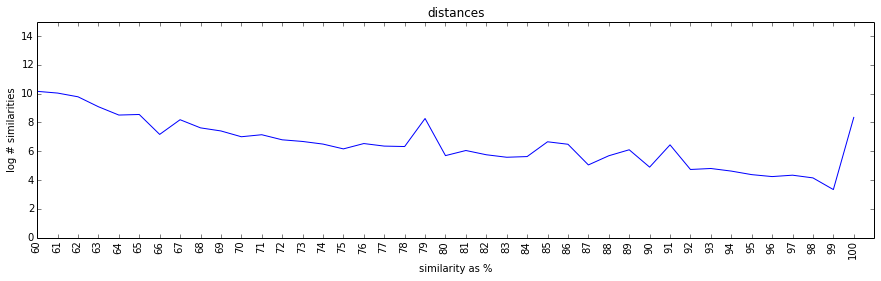

In [35]:
# run this cell after the cells below
distances = collections.Counter()
for (x, d) in chunk_dist.items():
    distances[int(round(d))] += 1

x = range(MATRIX_THRESHOLD, 101)
fig = plt.figure(figsize=[15, 4])
plt.plot(x, [math.log(max((1, distances[y]))) for y in x], 'b-')
plt.axis([MATRIX_THRESHOLD, 101, 0, 15])
plt.xlabel('similarity as %')
plt.ylabel('log # similarities')
plt.xticks(x, x, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15);
plt.title('distances');

# The rest is code

From here we start computing.

# Firing up the engines

In [1]:
import sys, os, re, collections, pickle, math, difflib, glob

from IPython.display import HTML, display
import matplotlib.pyplot as plt
%matplotlib inline
PICKLE_PROTOCOL = 3

from difflib import SequenceMatcher
from Levenshtein import ratio

import laf
from laf.fabric import LafFabric
from etcbc.preprocess import prepare
fabric = LafFabric()

  0.00s This is LAF-Fabric 4.5.3
API reference: http://laf-fabric.readthedocs.org/en/latest/texts/API-reference.html
Feature doc: http://shebanq-doc.readthedocs.org/en/latest/texts/welcome.html



# Loading the feature data

In [2]:
version = '4b'
API = fabric.load('etcbc{}'.format(version), '--', 'parallel', {
    "xmlids": {"node": False, "edge": False},
    "features": ('''
        otype
        lex g_word_utf8 trailer_utf8
        book chapter verse label number
    ''',
    ''),
    "prepare": prepare,
    "primary": False,
}, verbose='NORMAL')
exec(fabric.localnames.format(var='fabric'))

  0.00s LOADING API: please wait ... 
  0.00s INFO: USING DATA COMPILED AT: 2015-06-29T05-30-49
  2.66s LOGFILE=/Users/dirk/SURFdrive/laf-fabric-output/etcbc4b/parallel/__log__parallel.txt
    12s ETCBC reference: http://laf-fabric.readthedocs.org/en/latest/texts/ETCBC-reference.html
  0.00s LOADING API with EXTRAs: please wait ... 
  0.00s INFO: USING DATA COMPILED AT: 2015-06-29T05-30-49
  0.01s INFO: DATA LOADED FROM SOURCE etcbc4b AND ANNOX -- FOR TASK parallel AT 2015-07-20T17-45-41
  0.00s INFO: DATA LOADED FROM SOURCE etcbc4b AND ANNOX -- FOR TASK parallel AT 2015-07-20T17-45-41


# Parameters

Here are the parameters on which the results crucially depend.

In [3]:
# chunking
CHUNK_LABELS = {True: 'fixed', False: 'object'}
CHUNK_LBS = {True: 'F', False: 'O'}
CHUNK_SIZES = (100, 50, 20, 10)
CHUNK_OBJECTS = ('verse','half_verse','sentence')

# preparing
EXCLUDED_CONS = '[>WJ=/\[]'             # weed out weak consonants
EXCLUDED_PAT = re.compile(EXCLUDED_CONS)

# similarity
MATRIX_THRESHOLD = 50
SIM_METHODS = ('SET', 'LCS')
SIMILARITIES = (100, 95, 90, 85, 80, 75, 70, 65, 60)

# progress indication
MEGA = 1000000
KILO = 1000
SIMILARITY_PROGRESS = 5 * MEGA
CLIQUES_PROGRESS = 1 * KILO

# locations and hyperlinks
CLIQUE_DIR = 'files/passages'
CHAPTER_DIR = 'chapters'

def reset_params():
    global CHUNK_FIXED, CHUNK_SIZE, CHUNK_OBJECT, CHUNK_LB, CHUNK_DESC
    global SIMILARITY_METHOD, SIMILARITY_THRESHOLD, MATRIX_THRESHOLD
    global meta
    meta = collections.OrderedDict()
    
    # chunking
    CHUNK_FIXED = None                      # kind of chunking: fixed size or by object
    CHUNK_SIZE = None                       # only relevant for CHUNK_FIXED = True
    CHUNK_OBJECT = None                     # only relevant for CHUNK_FIXED = False; see CHUNK_OBJECTS in next cell
    CHUNK_LB = None                         # computed from CHUNK_FIXED, CHUNK_SIZE, CHUNK_OBJ
    CHUNK_DESC = None                       # computed from CHUNK_FIXED, CHUNK_SIZE, CHUNK_OBJ
    # similarity
    MATRIX_THRESHOLD = None                 # minimal similarity used to fill the matrix of similarities
    SIMILARITY_METHOD = None                # see SIM_METHODS in next cell
    SIMILARITY_THRESHOLD = None             # minimal similarity used to put elements together in cliques
    meta = collections.OrderedDict()

def do_params(chunk_f, chunk_i, sim_m, sim_thr):
    global CHUNK_FIXED, CHUNK_SIZE, CHUNK_OBJECT, CHUNK_LB, CHUNK_DESC
    global SIMILARITY_METHOD, SIMILARITY_THRESHOLD, MATRIX_THRESHOLD
    global meta
    do_chunk = False
    do_prep = False
    do_sim = False
    do_clique = False
    meta = collections.OrderedDict()
    if chunk_f != CHUNK_FIXED or (chunk_f and chunk_i != CHUNK_SIZE) or (not chunk_f and chunk_i != CHUNK_OBJECT):
        do_chunk = True
        do_prep = True
        do_sim = True
        do_clique = True
        CHUNK_FIXED = chunk_f
        if chunk_f: CHUNK_SIZE = chunk_i
        else: CHUNK_OBJECT = chunk_i
    if sim_m != SIMILARITY_METHOD:
        do_prep = True
        do_sim = True
        do_clique = True
        SIMILARITY_METHOD = sim_m
    if sim_thr != SIMILARITY_THRESHOLD:
        do_clique = True
        SIMILARITY_THRESHOLD = sim_thr    
    MATRIX_THRESHOLD = 50 if SIMILARITY_METHOD == 'SET' else 60
    CHUNK_LB = CHUNK_LBS[CHUNK_FIXED]
    CHUNK_DESC = CHUNK_SIZE if CHUNK_FIXED else CHUNK_OBJECT

    meta['CHUNK TYPE'] = 'FIXED {}'.format(CHUNK_SIZE) if CHUNK_FIXED else 'OBJECT {}'.format(CHUNK_OBJECT)
    meta['MATRIX THRESHOLD'] = MATRIX_THRESHOLD
    meta['SIMILARITY METHOD'] = SIMILARITY_METHOD
    meta['SIMILARITY THRESHOLD'] = SIMILARITY_THRESHOLD
    return (do_chunk, do_prep, do_sim, do_clique)

reset_params()

# Chunking

In [4]:
def chunking(do_chunk):
    global chunks, book_rank
    if not do_chunk:
        msg('CHUNKING ({} {}): already chunked into {} chunks'.format(CHUNK_LB, CHUNK_DESC, len(chunks)))
        meta['# CHUNKS'] = len(chunks)
        return
    msg('CHUNKING ({} {})'.format(CHUNK_LB, CHUNK_DESC))
    chunks = []
    book_rank = {}
    for b in F.otype.s('book'):
        book_name = F.book.v(b)
        book_rank[book_name] = b
        words = L.d('word', b)
        nwords = len(words)
        if CHUNK_FIXED:
            nchunks = nwords // CHUNK_SIZE
            if nchunks == 0: 
                nchunks = 1
                common_incr = nwords
                special_incr = 0
            else:            
                rem = nwords % CHUNK_SIZE
                common_incr = rem // nchunks
                special_incr = rem % nchunks
            word_in_chunk = -1
            cur_chunk = -1
            these_chunks = []

            for w in words:
                word_in_chunk += 1
                if word_in_chunk == 0 or (word_in_chunk >= CHUNK_SIZE + common_incr + (1 if cur_chunk < special_incr else 0)):
                    word_in_chunk = 0
                    these_chunks.append([])
                    cur_chunk += 1
                these_chunks[-1].append(w)
        else:
            these_chunks = [L.d('word', c) for c in L.d(CHUNK_OBJECT, b)]

        chunks.extend(these_chunks)

        chunkvolume = sum(len(c) for c in these_chunks)
        msg('{:<20s} {:>5} words; {:>5} chunks; sizes {:>5} to {:>5}; {:>5}'.format(
            book_name, nwords, len(these_chunks), 
            min(len(c) for c in these_chunks), 
            max(len(c) for c in these_chunks),
            'OK' if chunkvolume == nwords else 'ERROR',
        ))
    meta['# CHUNKS'] = len(chunks)
    msg('CHUNKING ({} {}): Made {} chunks'.format(CHUNK_LB, CHUNK_DESC, len(chunks)))

# Preparing

In [5]:
def preparing(do_prepare):
    global chunk_data
    if not do_prepare:
        msg('PREPARING ({} {} {}): Already prepared'.format(CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD))
        return
    msg('PREPARING ({} {} {})'.format(CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD))
    chunk_data = []
    if SIMILARITY_METHOD == 'SET':
        for c in chunks:
            words = (EXCLUDED_PAT.sub('', F.lex.v(w).replace('<', 'O')) for w in c)
            clean_words = (w for w in words if w != '')
            this_data = frozenset(clean_words)
            chunk_data.append(this_data)
    else:
        for c in chunks:
            words = (EXCLUDED_PAT.sub('', F.lex.v(w).replace('<', 'O')) for w in c)
            clean_words = (w for w in words if w != '')
            this_data = ' '.join(clean_words)
            chunk_data.append(this_data)
    msg('PREPARING ({} {} {}): Done {} chunks.'.format(CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, len(chunk_data)))

# Similarity computation

In [6]:
chunk_dist = {}

def similarity(do_sim):
    global chunk_dist
    total_chunks = len(chunks) 
    total_distances = total_chunks * (total_chunks - 1) // 2
    meta['# SIMILARITY COMPARISONS'] = total_distances
    
    SIMILARITY_PROGRESS = total_distances // 100
    if SIMILARITY_PROGRESS >= MEGA:
        sim_unit = MEGA
        sim_lb = 'M'
    else:
        sim_unit = KILO
        sim_lb = 'K'
    
    if not do_sim:
        msg('SIMILARITY ({} {} {} M>{}): Already loaded {:>5} {} ({}) comparisons with {} entries in matrix'.format(
            CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
            total_distances // sim_unit, sim_lb, total_distances, len(chunk_dist),
        ))
        meta['# STORED SIMILARITIES'] = len(chunk_dist)
        return

    matrix_path = my_file('matrix_{}_{}_{}_{}'.format(CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD))

    if os.path.exists(matrix_path):
        with open(matrix_path, 'rb') as f: chunk_dist = pickle.load(f)
        msg('SIMILARITY ({} {} {} M>{}): Loaded: {:>5} {} ({}) comparisons with {} entries in matrix'.format(
            CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
            total_distances // sim_unit, sim_lb, total_distances, len(chunk_dist),
        ))
        meta['# STORED SIMILARITIES'] = len(chunk_dist)
        return

    msg('SIMILARITY ({} {} {} M>{}): Computing {:>5} {} ({}) comparisons and saving entries in matrix'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
        total_distances // sim_unit, sim_lb, total_distances
    ))
    chunk_dist = {}
    wc = 0
    wt = 0
    if SIMILARITY_METHOD == 'SET':
        # method SET: all chunks have been reduced to sets, ratio between lengths of intersection and union
        for i in range(total_chunks):
            c_i = chunk_data[i]
            for j in range(i + 1, total_chunks):
                c_j = chunk_data[j]
                u = len(c_i | c_j)
                d = 100 * len(c_i & c_j) / u if u != 0 else 0
                if d >= MATRIX_THRESHOLD:
                    chunk_dist[(i,j)] = d
                wc += 1
                wt += 1
                if wc == SIMILARITY_PROGRESS:
                    wc = 0
                    msg('SIMILARITY ({} {} {} M>{}): Computed {:>5} {} comparisons and saved {} entries in matrix'.format(
                        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
                        wt // sim_unit, sim_lb, len(chunk_dist),
                    ))
    elif SIMILARITY_METHOD == 'LCS':
        # method LCS: chunks are sequence aligned, ratio between length of all common parts and total length
        for i in range(total_chunks):
            c_i = chunk_data[i]
            for j in range(i + 1, total_chunks):
                c_j = chunk_data[j]
                d = 100 * ratio(c_i, c_j)
                if d >= MATRIX_THRESHOLD:
                    chunk_dist[(i,j)] = d
                wc += 1
                wt += 1
                if wc == SIMILARITY_PROGRESS:
                    wc = 0
                    msg('SIMILARITY ({} {} {} M>{}): Computed {:>5} {} comparisons and saved {} entries in matrix'.format(
                        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
                        wt // sim_unit, sim_lb, len(chunk_dist),
                    ))

    with  open(matrix_path, 'wb') as f: pickle.dump(chunk_dist, f, protocol=PICKLE_PROTOCOL)
    msg('SIMILARITY ({} {} {} M>{}): Computed {:>5} {} ({}) comparisons and saved {} entries in matrix'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD,
        wt // sim_unit, sim_lb, wt, len(chunk_dist),
    ))
    
    meta['# STORED SIMILARITIES'] = len(chunk_dist)

# Cliques

Based on the value for the ``SIMILARITY_THRESHOLD`` we use the similarity matrix to pick the *interesting*
similar pairs out of it.

From these pairs we lump together our cliques.

We use a kind of canopy clustering technique for that.

That involves an iteration over the values of ``CLIQUE_THRESHOLD`` to minimize the number of singleton cliques.

In [7]:
def key_chunk(i):
    c = chunks[i]
    w = c[0]
    return  (-len(c), L.u('book', w), L.u('chapter', w), L.u('verse', w))

def meta_clique_pre():
    global similars, passages
    msg('CLIQUES ({} {} {} M>{} S>{}): inspecting the similarity matrix'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
    ))
    equals = {x for x in chunk_dist if chunk_dist[x] >= 100}
    similars = {x for x in chunk_dist if chunk_dist[x] >= SIMILARITY_THRESHOLD}
    passage_set = set()
    for (i,j) in similars:
        passage_set.add(i)
        passage_set.add(j)
    passages = sorted(passage_set, key=key_chunk)

    meta['LOWEST  AVAILABLE SIMILARITY'] = min(chunk_dist.values()) if len(chunk_dist) else '!empty set!'
    meta['HIGHEST AVAILABLE SIMILARITY'] = max(chunk_dist.values()) if len(chunk_dist) else '!empty set!'
    meta['# EQUAL COMPARISONS'] = len(equals)
    meta['# SIMILAR COMPARISONS'] = len(similars)
    meta['# SIMILAR PASSAGES'] = len(passages)

def meta_clique_post():
    meta['# CLIQUES'] = len(cliques)
    scliques = collections.Counter()
    for c in cliques:
        scliques[len(c)] += 1
    totmn = 0
    totcn = 0
    for (ln, n) in sorted(scliques.items(), key=lambda x: x[0]):
        totmn += ln * n
        totcn += n
        msg('CLIQUES ({} {} {} M>{} S>{}): {:>4} cliques of length {:>4}'.format(
            CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
            n, ln,
        ))
        meta['# CLIQUES of LENGTH {:>4}'.format(ln)] = n
    msg('CLIQUES ({} {} {} M>{} S>{}): {} members in {} cliques'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
        totmn, totcn,
    ))
    
def cliqueing(do_clique):
    global cliques
    if not do_clique:
        msg('CLIQUES ({} {} {} M>{} S>{}): Already loaded {} cliques out of {} candidates from {} comparisons'.format(
            CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
            len(cliques), len(passages), len(similars),            
        ))
        return
    msg('CLIQUES ({} {} {} M>{} S>{}): fetching similars and chunk candidates'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,        
    ))
    meta_clique_pre()
    clique_path = my_file(
        'clique_{}_{}_{}_{}_{}'.format(CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD)
    )
    if os.path.exists(clique_path):
        with open(clique_path, 'rb') as f: cliques = pickle.load(f)
        msg('CLIQUES ({} {} {} M>{} S>{}): Loaded: {:>5} cliques out of {:>6} chunks from {} comparisons'.format(
            CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
            len(cliques), len(passages), len(similars),            
        ))
        meta_clique_post()
        return

    msg('CLIQUES ({} {} {} M>{} S>{}): Composing cliques out of {:>6} chunks from {} comparisons'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
        len(passages), len(similars),            
    ))
    cliques_unsorted = []
    np = 0
    npc = 0
    for i in passages:
        added = None
        removable = set()
        for (k, c) in enumerate(cliques_unsorted):
            origc = tuple(c)
            for j in origc:            
                d = chunk_dist.get((i,j), 0) if i < j else chunk_dist.get((j,i), 0) if j < i else 0
                if d >= SIMILARITY_THRESHOLD:
                    if added == None:
                        c.add(i)
                        added = k
                    else:
                        cliques_unsorted[added] |= c
                        removable.add(k)
                    break
        if added == None:
            cliques_unsorted.append({i})
        else:
            if len(removable):
                cliques_unsorted = [c for (k,c) in enumerate(cliques_unsorted) if k not in removable]
        np += 1
        npc += 1
        if npc == CLIQUES_PROGRESS:
            npc = 0
            msg('CLIQUES ({} {} {} M>{} S>{}): Composed {:>5} cliques out of {:>6} chunks'.format(
                CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
                len(cliques_unsorted), np,
            ))
    cliques = sorted([tuple(sorted(c, key=key_chunk)) for c in cliques_unsorted])
    with  open(clique_path, 'wb') as f: pickle.dump(cliques, f, protocol=PICKLE_PROTOCOL)
    meta_clique_post()
    msg('CLIQUES ({} {} {} M>{} S>{}): Composed and saved {:>5} cliques out of {:>6} chunks from {} comparisons'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
        len(cliques), len(passages), len(similars),            
    ))

# Pretty output

Here are the definitions for formatting the (HTML) output.

In [8]:
css = '''
td.vl {
    font-family: Verdana, Arial, sans-serif;
    font-size: small;
    text-align: right;
    color: #aaaaaa;
    width: 10%;
    direction: ltr;
    border-left: 2px solid #aaaaaa;
    border-right: 2px solid #aaaaaa;
}
td.ht {
    font-family: Ezra SIL, SBL Hebrew, Verdana, sans-serif;
    font-size: x-large;
    line-height: 1.7;
    text-align: right;
    direction: rtl;
}
table.ht {
    width: 100%;
    direction: rtl;
    border-collapse: collapse;
}
td.ht {
    border-left: 2px solid #aaaaaa;
    border-right: 2px solid #aaaaaa;
}
tr.ht.tb {
    border-top: 2px solid #aaaaaa;
    border-left: 2px solid #aaaaaa;
    border-right: 2px solid #aaaaaa;
}
tr.ht.bb {
    border-bottom: 2px solid #aaaaaa;
    border-left: 2px solid #aaaaaa;
    border-right: 2px solid #aaaaaa;
}
span.m {
    background-color: #aaaaff;
}
span.f {
    background-color: #ffaaaa;
}
span.x {
    background-color: #ffffaa;
    color: #bb0000;
}
span.delete {
    background-color: #ffaaaa;
}
span.insert {
    background-color: #aaffaa;
}
span.replace {
    background-color: #ffff00;
}

'''

diffhead = '''
<head>
    <meta http-equiv="Content-Type"
          content="text/html; charset=UTF-8" />
    <title></title>
    <style type="text/css">
        table.diff {
            font-family: Ezra SIL, SBL Hebrew, Verdana, sans-serif; 
            font-size: x-large;
            text-align: right;
        }
        .diff_header {background-color:#e0e0e0}
        td.diff_header {text-align:right}
        .diff_next {background-color:#c0c0c0}
        .diff_add {background-color:#aaffaa}
        .diff_chg {background-color:#ffff77}
        .diff_sub {background-color:#ffaaaa}
    </style>
</head>
'''

def xterse_chunk(i):
    chunk = chunks[i]
    fword = chunk[0]
    book = L.u('book', fword)
    chapter = L.u('chapter', fword)
    return (book, chapter)

def xterse_clique(ii):
    return tuple(sorted({xterse_chunk(i) for i in ii}))

def terse_chunk(i):
    chunk = chunks[i]
    fword = chunk[0]
    book = L.u('book', fword)
    chapter = L.u('chapter', fword)
    verse = L.u('verse', fword)
    return (book, chapter, verse)

def terse_clique(ii):
    return tuple(sorted({terse_chunk(i) for i in ii}))

def verse_chunk(i):
    (bk, ch, vs) = i
    book = F.book.v(bk)
    chapter = F.chapter.v(ch)
    verse = F.verse.v(vs)
    text = ''.join('{}{}'.format(F.g_word_utf8.v(w), F.trailer_utf8.v(w)) for w in L.d('word', vs))
    verse_label = '<td class="vl">{} {}:{}</td>'.format(book, chapter, verse)
    htext = '{}<td class="ht">{}</td>'.format(verse_label, text)
    return '<tr class="ht">{}</tr>'.format(htext)

def verse_clique(ii):
    return '<table class="ht">{}</table>\n'.format(''.join(verse_chunk(i) for i in sorted(ii)))

def condense(vlabels):
    cnd = ''
    (cur_b, cur_c) = (None, None)
    for (b, c, v) in vlabels:
        sep = '' if cur_b == None else '. ' if cur_b != b else '; ' if cur_c != c else ', '
        show_b = b+' ' if cur_b != b else ''
        show_c = c+':' if cur_b != b or cur_c != c else ''
        (cur_b, cur_c) = (b, c)
        cnd += '{}{}{}{}'.format(sep, show_b, show_c, v)
    return cnd

def print_diff(a, b):
    arep = ''
    brep = ''
    for (lb, ai, aj, bi, bj) in SequenceMatcher(isjunk=None, a=a, b=b, autojunk=False).get_opcodes():
        if lb == 'equal':
            arep += a[ai:aj]
            brep += b[bi:bj]
        elif lb == 'delete':
            arep += '<span class="{}">{}</span>'.format(lb, a[ai:aj])
        elif lb == 'insert':
            brep += '<span class="{}">{}</span>'.format(lb, b[bi:bj])
        else:
            arep += '<span class="{}">{}</span>'.format(lb, a[ai:aj])
            brep += '<span class="{}">{}</span>'.format(lb, b[bi:bj])
    return (arep, brep)
    
def print_chunk(prev, text, verse_labels, prevlabels):
    if prev == None:
        return '''
<tr class="ht tb bb"><td class="vl">{}</td><td class="ht">{}</td></tr>
'''.format(
            condense(verse_labels), 
            text,
        )
    else:
        (prevline, textline) = print_diff(prev, text)
        return '''
<tr class="ht tb"><td class="vl">{}</td><td class="ht">{}</td></tr>
<tr class="ht bb"><td class="vl">{}</td><td class="ht">{}</td></tr>
'''.format(
    condense(prevlabels) if prevlabels != None else 'previous',
    prevline,
    condense(verse_labels), 
    textline,
)

def print_clique(ii):
    condensed = collections.OrderedDict()
    for i in sorted(ii, key = lambda c: (-len(chunks[c]), c)):
        chunk = chunks[i]
        fword = chunk[0]
        book = F.book.v(L.u('book', fword))
        chapter = F.chapter.v(L.u('chapter', fword))
        verse = F.verse.v(L.u('verse', fword))
        text = ''.join('{}{}'.format(F.g_word_utf8.v(w), F.trailer_utf8.v(w)) for w in chunk)
        condensed.setdefault(text, []).append((book, chapter, verse))
    result = []
    nv = len(condensed.items())
    prev = None
    for (text, verse_labels) in condensed.items():
        if prev == None:
            if nv == 1: result.append(print_chunk(None, text, verse_labels, None))
            else:
                prev = text
                prevlabels = verse_labels
                continue
        else:
            result.append(print_chunk(prev, text, verse_labels, prevlabels))
            prev = text
            prevlabels = None
    return '<table class="ht">{}</table>\n'.format(''.join(result))

def index_clique(n, ii):
    verse_labels = []
    for i in sorted(ii, key = lambda c: (-len(chunks[c]), c)):
        chunk = chunks[i]
        fword = chunk[0]
        book = F.book.v(L.u('book', fword))
        chapter = F.chapter.v(L.u('chapter', fword))
        verse = F.verse.v(L.u('verse', fword))
        verse_labels.append((book, chapter, verse))
    return '<p><b>{}</b> <a href="#c_{}">{}</a></p>'.format(
        n, n, condense(verse_labels),
    )

def lines_chapter(c):
    lines = []
    for v in L.d('verse', c):
        vl = F.verse.v(v)
        text = ''.join('{}{}'.format(F.g_word_utf8.v(w), F.trailer_utf8.v(w)) for w in L.d('word', v))
        lines.append('{} {}'.format(vl, text.replace('\n', ' ')))
    return lines

def compare_chapters(c1, c2, lb1, lb2):
    dh = difflib.HtmlDiff(wrapcolumn=80)
    table_html = dh.make_table(
        lines_chapter(c1), 
        lines_chapter(c2), 
        fromdesc=lb1, 
        todesc=lb2, 
        context=False, 
        numlines=5,
    )
    htext = '''<html>{}<body>{}</body></html>'''.format(diffhead, table_html)
    return htext

# Producing output

In [9]:
def printing():
    global outputs
    msg('PRINT ({} {} {} M>{} S>{}): sorting out cliques'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
    ))
    xt_cliques = {xterse_clique(c) for c in cliques}     # chapter cliques as tuples of (b, ch) tuples
    bin_cliques = {c for c in xt_cliques if len(c) == 2} # chapter cliques with exactly two chapters
    # all chapters that occur in binary chapter cliques
    bin_chapters = {c[0] for c in bin_cliques} | {c[1] for c in bin_cliques}
    meta['# BINARY CHAPTER DIFFS'] = len(bin_cliques)

    # We generate one kind of info for binary chapter cliques (the majority of cases).
    # The remaining cases are verse cliques that do not occur in such chapters, e.g. because they
    # have member chunks in the same chapter, or in multiple (more than two) chapters.

    msg('PRINT ({} {} {} M>{} S>{}): formatting {} cliques involving {} binary chapter diffs'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
        len(cliques), len(bin_cliques),
    ))
    meta_html = '\n'.join('{:<40} : {:>10}'.format(k, str(meta[k])) for k in meta)

    base_tpl = '{{}}_{}_{}_{}_M{}_S{}'.format(
        CHUNK_LB,
        CHUNK_DESC,
        SIMILARITY_METHOD,
        MATRIX_THRESHOLD,
        SIMILARITY_THRESHOLD, 
    )
    param_spec = '''
    <table>
    <tr><th>chunking method</th><td>{}</td></tr>
    <tr><th>chunking description</th><td>{}</td></tr>
    <tr><th>similarity method</th><td>{}</td></tr>
    <tr><th>similarity threshold</th><td>{}</td></tr>
    </table>
    '''.format(
        CHUNK_LABELS[CHUNK_FIXED],
        CHUNK_DESC,
        SIMILARITY_METHOD, 
        SIMILARITY_THRESHOLD, 
    )
    param_lab = 'chunk-{}-{}-sim-{}-m{}-s{}'.format(
        CHUNK_LB,
        CHUNK_DESC,
        SIMILARITY_METHOD,
        MATRIX_THRESHOLD,
        SIMILARITY_THRESHOLD, 
    )
    base_name = base_tpl.format('00index')
    all_name = base_tpl.format('01all')

    clique_links = []
    clique_links.append(('{}.html'.format(all_name), 'Big list of all cliques'))

    nexist = 0
    nnew = 0
    for cl in sorted(bin_cliques):
        lb1 = '{} {}'.format(F.book.v(cl[0][0]), F.chapter.v(cl[0][1]))
        lb2 = '{} {}'.format(F.book.v(cl[1][0]), F.chapter.v(cl[1][1]))
        hfilename = '{} vs {}.html'.format(lb1, lb2)
        hfilepath = '{}/{}/{}'.format(CLIQUE_DIR, CHAPTER_DIR, hfilename)
        if not os.path.exists(hfilepath):
            htext = compare_chapters(cl[0][1], cl[1][1], lb1, lb2)
            with open(hfilepath, 'w') as f: f.write(htext)
            msg('PRINT ({} {} {} M>{} S>{}): written {}'.format(
                CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
                hfilename,
            ))
            nnew += 1
        else:
            nexist += 1
        clique_links.append(('{}/{}'.format(CHAPTER_DIR, hfilename), '{} versus {}'.format(lb1, lb2)))

    msg('PRINT ({} {} {} M>{} S>{}): Chapter diffs: {} newly created and {} already existing'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
        nnew, nexist,
    ))

    allgeni_html = (index_clique(i, c) for (i,c) in enumerate(cliques))
    allgen_html = ('<h3><a name="c_{}">Clique {}</a></h3>\n{}'.format(
        i, i, print_clique(c),
    ) for (i,c) in enumerate(cliques))

    index_html_tpl = '''
    {}
    <h1>Binary chapter comparisons</h1>
    {}
    '''

    a_tpl_file = '<p><a target="_blank" href="{}">{}</a></p>'

    index_html_file = index_html_tpl.format(
        a_tpl_file.format(*clique_links[0]),
        '\n'.join(a_tpl_file.format(*c) for c in clique_links[1:]),
    )

    listing_html = '{}\n{}'.format(
        '\n'.join(allgeni_html),
        '\n'.join(allgen_html),
    )

    for (fname, content_html, tit) in (
        (base_name, index_html_file, 'Index '+param_lab),
        (all_name, listing_html, 'Listing '+param_lab),
    ):                            
        with open('{}/{}.html'.format(CLIQUE_DIR, fname), 'w') as f: f.write('''<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<title>{}</title>
<style type="text/css">
{}
</style>
</head>
<body>
<h1>{}</h1>
{}
<p><a href="#meta">more parameters and stats</a></p>
{}
<h1><a name="meta">Parameters and stats</a></h1>
<pre>{}</pre>
</body>
</html>'''.format(
            tit,
            css,
            tit,
            param_spec,
            content_html,
            meta_html,
        ))
    destination = outputs.setdefault(MATRIX_THRESHOLD, {})
    destination[(CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, SIMILARITY_THRESHOLD)] = (len(passages), len(cliques))
    msg('PRINT ({} {} {} M>{} S>{}): formatted {} cliques involving {} binary chapter diffs'.format(
        CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, MATRIX_THRESHOLD, SIMILARITY_THRESHOLD,
        len(cliques), len(bin_cliques),
    ))

# Defining experiments

In [10]:
recommended = {
    ('O', 'verse', 'SET', 85),
    ('O', 'verse', 'LCS', 90),
    ('O', 'half_verse', 'SET', 90),
    ('O', 'half_verse', 'LCS', 95),
}
deprecated = {}
dubious = {}

other_exps = ''

EXP_FILE = 'experiments.txt'
EXP_PATH = my_file(EXP_FILE)

VALUE_LABELS = dict(
    mis='no results available',
    rec='promising results: recommended',
    dep='messy results: deprecated',
    out='method deprecated',
    nor='unassessed quality: inspection needed',
    lr='this experiment is the last one run',
)

def writeoutputs():
    global outputs
    with open(EXP_PATH, 'wb') as f:
        pickle.dump(outputs, f, protocol=PICKLE_PROTOCOL)

def readoutputs():
    global outputs
    if not os.path.exists(EXP_PATH):
        outputs = {}
    else:
        with open(EXP_PATH, 'rb') as f:
            outputs = pickle.load(f)

ecss = '''
<style type="text/css">
.mis {background-color: #cccccc;}
.rec {background-color: #aaffaa;}
.dep {background-color: #ffaaaa;}
.dub {background-color: #ffddaa;}
.out {background-color: #ffddff;}
.nor {background-color: #fcfcff;}
.ps  {font-style: italic;}
.cl  {font-weight: bold;}
.lr  {font-weight: bold; background-color: #ffffaa;}
</style>
'''

legend = '''
<table>
<tr><td class="mis">{mis}</td></tr>
<tr><td class="rec">{rec}</td></tr>
<tr><td class="dep">{dep}</td></tr>
<tr><td class="out">{out}</td></tr>
<tr><td class="nor">{nor}</td></tr>
</table>
'''.format(**VALUE_LABELS)

def gen_html():
    global other_exps
    msg("EXPERIMENT: Generating html report")
    stats = collections.Counter()
    these_outputs = outputs.get(MATRIX_THRESHOLD, {})
    other_exps = '''
{}
<table>
<tr><th>chunk type</th><th>chunk size</th><th>similarity method</th>{}</tr>
'''.format(legend, ''.join('<th>{}</th>'.format(sim_thr) for sim_thr in SIMILARITIES))
    for chunk_f in (True, False):
        if chunk_f:
            chunk_items = CHUNK_SIZES
        else:
            chunk_items = CHUNK_OBJECTS
        chunk_lb = CHUNK_LABELS[chunk_f]
        for chunk_i in chunk_items:
            for sim_m in SIM_METHODS:
                other_exps += '<tr><td>{}</td><td>{}</td><td>{}</td>'.format(
                    CHUNK_LABELS[chunk_f], chunk_i, sim_m,
                )
                for sim_thr in SIMILARITIES:
                    okey = ('{}_{}'.format(chunk_lb, chunk_i), sim_m, sim_thr)
                    values = these_outputs.get(okey)
                    if values == None:
                        result = '<td class="mis">&nbsp;</td>'
                        stats['mis'] += 1
                    else:
                        cls = 'rec' if okey in recommended else \
                        'dep' if okey in deprecated else \
                        'dub' if okey in dubious else \
                        'out' if chunk_f else \
                        'nor'
                        stats[cls] += 1
                        (lr_el, lr_lb) = ('', '')
                        if (CHUNK_LB, CHUNK_DESC, SIMILARITY_METHOD, SIMILARITY_THRESHOLD) == (
                            chunk_lb, chunk_i, sim_m, sim_thr,
                        ):
                            lr_el = '<span class="lr">*</span>'
                            lr_lb = VALUE_LABELS['lr']
                        result = '<td class="{}">{}<a title="{}" target="_blank" href="{}">{}</a></td>'.format(
                            cls,
                            lr_el,
                            lr_lb,
                            '{}/00index_{}_{}_{}_{}.html'.format(CLIQUE_DIR, chunk_lb, chunk_i, sim_m, sim_thr),
                            '<span class="ps">{}</span> in <span class="cl">{}</span>'.format(
                                values[0], values[1],
                            )
                        )
                    other_exps += result
                other_exps += '</tr>'
    other_exps += '</table>\n'
    for stat in sorted(stats):
        msg('EXPERIMENT: {:>3} {}'.format(stats[stat], VALUE_LABELS[stat]))
    msg("EXPERIMENT: Generated html report")

def do_experiment(chunk_f, chunk_i, sim_m, sim_thr, do_index):
    if do_index:
        readoutputs()
    (do_chunk, do_prep, do_sim, do_clique) = do_params(chunk_f, chunk_i, sim_m, sim_thr)
    chunking(do_chunk)
    preparing(do_prep)
    similarity(do_sim)
    cliqueing(do_clique)
    printing()
    if do_index:
        writeoutputs()
        gen_html()
    
def reset_experiments():
    global outputs
    readoutputs()
    if MATRIX_THRESHOLD in outputs:
        del outputs[MATRIX_THRESHOLD]
    reset_params()
    writeoutputs()
    gen_html()

def do_all_experiments():
    global outputs
    reset_experiments()
    for chunk_f in (True, False):
        if chunk_f:
            chunk_items = CHUNK_SIZES
        else:
            chunk_items = CHUNK_OBJECTS
        for chunk_i in chunk_items:
            for sim_m in SIM_METHODS:
                for sim_thr in SIMILARITIES:
                    do_experiment(chunk_f, chunk_i, sim_m, sim_thr, False)
    writeoutputs()
    gen_html()

# Performing experiments

In [11]:
#reset_params()
#do_experiment(False, 'half_verse', 'SET', 85, True)
#SIMILARITY_PROGRESS = 100 * KILO
#do_experiment(True, 100, 'LCS', 100, True)
do_all_experiments()

    28s EXPERIMENT: Generating html report
    28s EXPERIMENT: 126 no results available
    28s EXPERIMENT: Generated html report
    28s CHUNKING (F 100)
    28s Genesis              28758 words;   287 chunks; sizes   100 to   101;    OK
    29s Exodus               23748 words;   237 chunks; sizes   100 to   101;    OK
    29s Leviticus            17099 words;   170 chunks; sizes   100 to   101;    OK
    29s Numeri               23186 words;   231 chunks; sizes   100 to   101;    OK
    29s Deuteronomium        20127 words;   201 chunks; sizes   100 to   101;    OK
    29s Josua                14523 words;   145 chunks; sizes   100 to   101;    OK
    29s Judices              14085 words;   140 chunks; sizes   100 to   101;    OK
    29s Samuel_I             18929 words;   189 chunks; sizes   100 to   101;    OK
    29s Samuel_II            15612 words;   156 chunks; sizes   100 to   101;    OK
    29s Reges_I              18684 words;   186 chunks; sizes   100 to   101;    OK
    2

In [13]:
HTML(other_exps)

In [225]:
HTML(ecss)